In [47]:
import gopax_api_wrapper as gopax
import numpy as np
import pandas as pd
import matplotlib
from datetime import datetime

In [2]:
#data frame을 받아서 표로 보여줌
def get_past_dataframe(trading_pair, start, end, interval):
    start_ts = gopax.get_timestamp(start)
    end_ts = gopax.get_timestamp(end)
    raw_result = gopax.get_past_data(trading_pair, start_ts, end_ts, interval)
    result = pd.DataFrame(raw_result, columns = ['time', 'low', 'high', 'open', 'close', 'volume'])
    return result

In [3]:
def get_clean_data(trading_pair, start, end, interval):
    diff = 9 * 3600
    s = start
    e = end
    ts = gopax.get_timestamp(s)
    te = gopax.get_timestamp(e)
    result = get_past_dataframe(trading_pair, s, e, interval)
    result = result[result.time >= ts * 1000]
    result = result[result.time < te * 1000]
    result['time'] = result['time'].apply(lambda x: datetime.utcfromtimestamp((x // 1000) + diff))
    return result

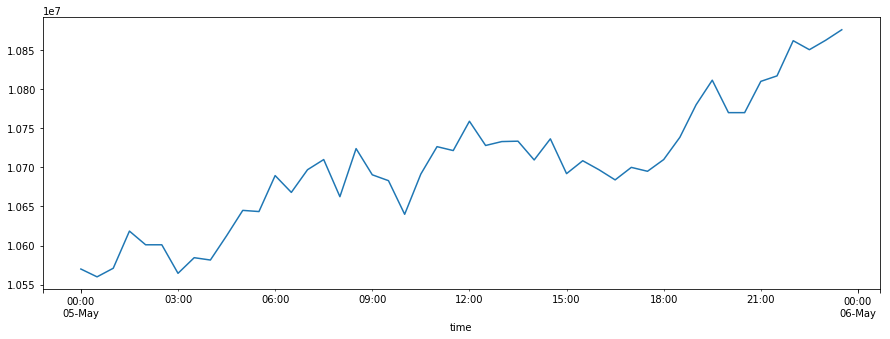

In [65]:
df = get_clean_data('BTC-KRW', '2018-05-05 00:00', '2018-05-06 00:00', 30)
df = df.set_index('time')
df['close'].plot(figsize = (15,5))

In [61]:
len(df)

719

In [62]:
#Open과 Close만 이용하여 최고, 최저점 분류

high = []
low = []
for i in range(len(df)):
    if df['close'][i] >= df['open'][i]:
        high.append(df['close'][i])
        low. append(df['open'][i])
    else:
        high.append(df['open'][i])
        low. append(df['close'][i])

In [63]:
# 피크 위치 찾기
# 고점
# 저점

high_peak = []
low_peak = []
high_label = []
low_label = []
for step in range(1, len(df)-1):
    if (high[step] >= high[step-1]) & (high[step] >= high[step+1]):
        high_peak.append(high[step])
        high_label.append(step)
    
    elif (low[step] <=low[step-1]) & (low[step] <=low[step+1]):
        low_peak.append(low[step])
        low_label.append(step)
        
print(high_peak)
print(high_label)
print(low_peak)
print(low_label)

[10618500, 10641500, 10645000, 10699000, 10710000, 10728000, 10726500, 10759000, 10738500, 10736500, 10700000, 10811500, 10862500, 10876000, 10844500, 10844500, 10839500, 10837500, 10836000, 10944500, 10969000, 10731500, 10731500, 10746500, 10696500, 10669500, 10669500, 10649500, 10570000, 10629500, 10647500, 10699500, 10460000, 10460000, 10498000, 10461500, 10426000, 10394500, 10415500, 10415500, 10430000, 10456000, 10495000, 10539000, 10440000, 10415500, 10405500, 10405500, 10409000, 10409000, 10389500, 10389500, 10205000, 10287500, 10240000, 10240000, 10235000, 10287000, 10299500, 10349500, 10206500, 10206500, 10102500, 10149000, 10168000, 10170000, 10185500, 10299000, 10331000, 10335000, 10375500, 10398500, 10398500, 10398500, 10346000, 10420000, 10446000, 10431500, 10399500, 10370000, 10360000, 10360000, 10344000, 10349500, 10349500, 10323000, 10186000, 10163500, 10211000, 10207000, 10050500, 9954500, 9992500, 9643000, 9566500, 9563500, 9408500, 9547000, 9512500, 9440000, 9463000,

In [64]:
for i in range(len(low_peak)-1):
    print(low_peak[i+1]-low_peak[i])


4500
0
75500
88000
-18500
-17500
0
-12000
40000
23500
107000
-10500
-67500
17500
-3500
-44000
39000
131500
-272000
-38500
-58500
0
39000
20000
-203000
-49000
79500
-80500
-50000
48000
21000
2000
61500
-61500
58000
-16000
-60500
23000
-209500
17500
16000
-14500
0
42000
9000
-92000
0
-150000
0
47000
0
220500
30000
8500
22500
0
-2000
67500
-42500
-55500
28000
-15000
6000
-45000
-130500
7000
-275500
0
63500
-53500
0
-325000
-1500
-31500
-201500
124500
-33000
-207000
0
-58500
262000
-17500
35000
-6000
-15000
43000
-63000
79000
7500
0
106500
119500
-19500
23500
74000
-58000
60500
-294000
-17000
3500
64500
9000
-15500
279500
17000
-85500
17500
0
-2000
-4000
-15500
-2000
0
0
51500
-226500
28500
58500
-120500
0
-410500
0
2000
33500
70500
-11000
115500
50000
-182000
108000
500
4000
-12000
-33500
68500
-28500
-16500
-78500
0
0
43500
-16500
42500
-18500
-41500
-109500
-145500
20500
-35000
85000
35500
9500
-60000
63500
-19000
79000
8500
-18000
32000
6000
-42000
46000
